In [1]:
# evaluate an ARIMA model using a walk-forward validation
#Reference: https://facebook.github.io/prophet/
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

from pmdarima.arima import auto_arima

In [2]:
ground_floor = pd.read_csv('/Users/Ellina/Desktop/Project_code/ground_floor_sorted.csv', header = None)
first_floor = pd.read_csv('/Users/Ellina/Desktop/Project_code/first_floor_sorted.csv', header = None)
second_floor = pd.read_csv('/Users/Ellina/Desktop/Project_code/second_floor_sorted.csv', header = None)
third_floor = pd.read_csv('/Users/Ellina/Desktop/Project_code/third_floor_sorted.csv', header = None)

### auto_arima reference

ref https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

ref https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


## Split Dataset

In [3]:
ground_floor.insert(loc=2, column='floor_num', value=1)
first_floor.insert(loc=2, column='floor_num', value=2)
second_floor.insert(loc=2, column='floor_num', value=3)
third_floor.insert(loc=2, column='floor_num', value=4)

In [4]:
train_size = round(len(ground_floor)*0.8)                                    

ground_floor_train = ground_floor[:train_size]
ground_floor_test = ground_floor[train_size:]

ground_floor_train[0] = pd.to_datetime(ground_floor_train[0])
ground_floor_test[0] = pd.to_datetime(ground_floor_test[0])

ground_floor_train = ground_floor_train.set_index(0)
ground_floor_test = ground_floor_test.set_index(0)


<ipython-input-4-a90771baca07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_floor_train[0] = pd.to_datetime(ground_floor_train[0])
<ipython-input-4-a90771baca07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_floor_test[0] = pd.to_datetime(ground_floor_test[0])


In [5]:
train_size = round(len(first_floor)*0.8)                                    

first_floor_train = first_floor[:train_size]
first_floor_test = first_floor[train_size:]

first_floor_train[0] = pd.to_datetime(first_floor_train[0])
first_floor_test[0] = pd.to_datetime(first_floor_test[0])

first_floor_train = first_floor_train.set_index(0)
first_floor_test = first_floor_test.set_index(0)

<ipython-input-5-ba407c3b4f6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_floor_train[0] = pd.to_datetime(first_floor_train[0])
<ipython-input-5-ba407c3b4f6f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_floor_test[0] = pd.to_datetime(first_floor_test[0])


In [6]:
train_size = round(len(second_floor)*0.8)                                    

second_floor_train = second_floor[:train_size]
second_floor_test = second_floor[train_size:]

second_floor_train[0] = pd.to_datetime(second_floor_train[0])
second_floor_test[0] = pd.to_datetime(second_floor_test[0])

second_floor_train = second_floor_train.set_index(0)
second_floor_test = second_floor_test.set_index(0)

<ipython-input-6-baf608d22ffb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_floor_train[0] = pd.to_datetime(second_floor_train[0])
<ipython-input-6-baf608d22ffb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_floor_test[0] = pd.to_datetime(second_floor_test[0])


In [7]:
train_size = round(len(third_floor)*0.8)                                    

third_floor_train = third_floor[:train_size]
third_floor_test = third_floor[train_size:]

third_floor_train[0] = pd.to_datetime(third_floor_train[0])
third_floor_test[0] = pd.to_datetime(third_floor_test[0])

third_floor_train = third_floor_train.set_index(0)
third_floor_test = third_floor_test.set_index(0)


<ipython-input-7-7886c2b0d0f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_floor_train[0] = pd.to_datetime(third_floor_train[0])
<ipython-input-7-7886c2b0d0f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_floor_test[0] = pd.to_datetime(third_floor_test[0])


In [8]:
#frames_train = [ground_floor_train, first_floor_train, second_floor_train, third_floor_train]
#frames_test = [ground_floor_test, first_floor_test, second_floor_test, third_floor_test]


In [9]:
#result_train = pd.concat(frames_train)
#result_test = pd.concat(frames_test)

In [10]:
#result_train[0] = pd.to_datetime(result_train[0])
#result_test[0] = pd.to_datetime(result_test[0])


In [11]:
#result_train = result_train.set_index(0)
#result_test = result_test.set_index(0)

In [12]:
#Generate New Dataset 
#result_train.to_csv('train_dataset.csv')
#result_test.to_csv('test_dataset.csv')


## Reframe Dataset and Plot

In [13]:
#split testing dataset for each floor
# ground_floor_testing = result_test[result_test['floor_num']==1]
# frist_floor_testing = result_test[result_test['floor_num']==2]
# second_floor_testing = result_test[result_test['floor_num']==3]
# third_floor_testing = result_test[result_test['floor_num']==4]

In [14]:
#Training dataset 
#We only need the column of people for ARIMA for each floor 
ground_arima_train = pd.DataFrame(ground_floor_train[1], index=ground_floor_train.index)
first_arima_train = pd.DataFrame(first_floor_train[1], index=first_floor_train.index)
second_arima_train = pd.DataFrame(second_floor_train[1], index=second_floor_train.index)
third_arima_train = pd.DataFrame(third_floor_train[1], index=third_floor_train.index)

In [15]:
#Testing dataset
ground_arima_test = pd.DataFrame(ground_floor_test[1], index=ground_floor_test.index)
first_arima_test = pd.DataFrame(first_floor_test[1], index=first_floor_test.index)
second_arima_test = pd.DataFrame(second_floor_test[1], index=second_floor_test.index)
third_arima_test = pd.DataFrame(third_floor_test[1], index=third_floor_test.index)


Text(0.5, 1.0, 'Train: Number of People vs Time (Third Floor)')

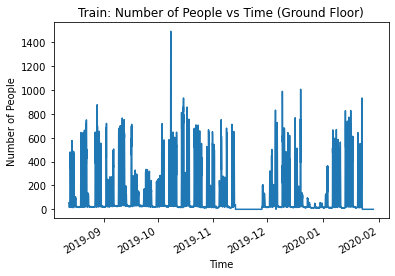

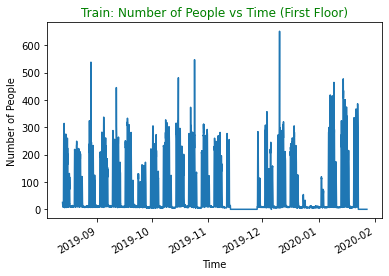

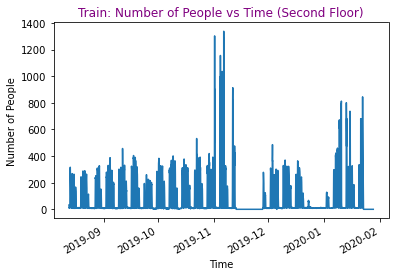

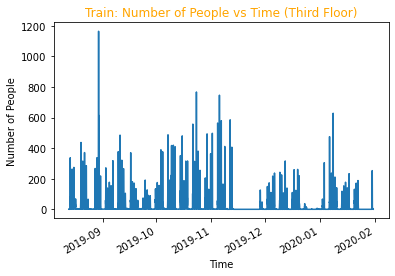

In [16]:
#Training Arima Plot
plt.figure(1)
#plt.figure(figsize=(16, 8))
ground_arima_train[1].plot()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Train: Number of People vs Time (Ground Floor)")


plt.figure(2)
#plt.figure(figsize=(16, 8))
first_arima_train[1].plot()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Train: Number of People vs Time (First Floor)", color="green")

plt.figure(3)
#plt.figure(figsize=(16, 8))
second_arima_train[1].plot()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Train: Number of People vs Time (Second Floor)", color="purple")

plt.figure(4)
#plt.figure(figsize=(16, 8))
third_arima_train[1].plot()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Train: Number of People vs Time (Third Floor)", color="orange")

Text(0.5, 1.0, 'Test: Number of People vs Time (Third Floor)')

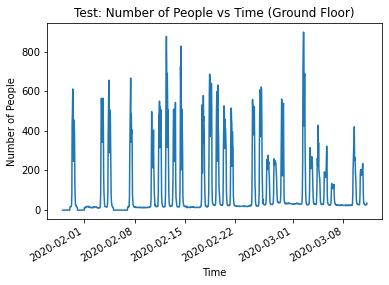

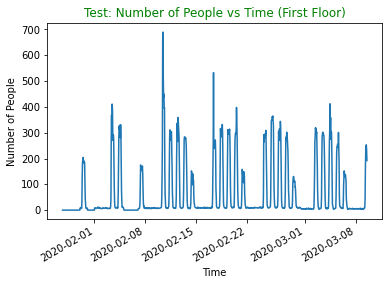

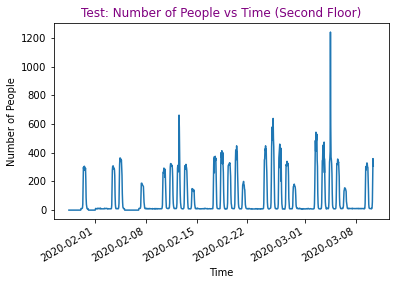

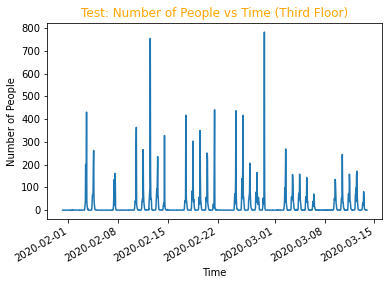

In [17]:
#Testing ARIMA Plot
plt.figure(1)
ground_arima_test[1].plot()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Test: Number of People vs Time (Ground Floor)")


plt.figure(2)
first_arima_test[1].plot()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Test: Number of People vs Time (First Floor)", color="green")

plt.figure(3)
second_arima_test[1].plot()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Test: Number of People vs Time (Second Floor)", color="purple")

plt.figure(4)
third_arima_test[1].plot()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Test: Number of People vs Time (Third Floor)", color="orange")


In [18]:
# #Reference: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
#How to find d
from statsmodels.tsa.stattools import adfuller
from numpy import log
ground_ADF_result = adfuller(ground_arima_train[1].values)
print('Ground ADF Statistic: %f' % ground_ADF_result[0])
print('Ground p-value: %f' % ground_ADF_result[1])

first_ADF_result = adfuller(first_arima_train[1])
print('first ADF Statistic: %f' % first_ADF_result[0])
print('first p-value: %f' % first_ADF_result[1])

second_ADF_result = adfuller(second_arima_train[1])
print('second ADF Statistic: %f' % second_ADF_result[0])
print('second p-value: %f' % second_ADF_result[1])

third_ADF_result = adfuller(third_arima_train[1])
print('second ADF Statistic: %f' % third_ADF_result[0])
print('second p-value: %f' % third_ADF_result[1])

Ground ADF Statistic: -6.937485
Ground p-value: 0.000000
first ADF Statistic: -5.662501
first p-value: 0.000001
second ADF Statistic: -6.551451
second p-value: 0.000000
second ADF Statistic: -6.801319
second p-value: 0.000000


In [19]:
# #How to find p 
# # PACF plot of 1st differenced series
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(ground_arima_train.values);
# axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,5))
# plot_pacf(ground_arima_train.values, ax=axes[1])

# plt.show()

In [20]:
ground_arima_model = auto_arima(ground_arima_train)
first_arima_model = auto_arima(first_arima_train)
second_arima_model = auto_arima(second_arima_train)
third_arima_model = auto_arima(third_arima_train)


ground_arima_model = auto_arima(ground_arima_train, start_p=1, start_q=1, test='adf',max_p=3, max_q=3, d=None, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
first_arima_model = auto_arima(first_arima_train, start_p=2, start_q=2, test='adf',d=None, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
second_arima_model = auto_arima(second_arima_train, start_p=2, start_q=2, test='adf',d=None, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
third_arima_model = auto_arima(third_arima_train, start_p=2, start_q=2, test='adf',d=None, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)




In [21]:
# from statsmodels.tsa.arima_model import ARIMA
# ground_model = ARIMA(ground_arima_train.values, order=(1,1,1))
# ground_model_fit = ground_model.fit(disp=0)
# print(ground_model_fit.summary())

In [22]:
# Actual vs Fitted
# ground_model_fit.plot_predict(dynamic=False)
# plt.show()

In [23]:
#arima_model.fit(ground_arima_train)

ground_arima_model.fit(ground_arima_train)
first_arima_model.fit(first_arima_train)
second_arima_model.fit(second_arima_train)
third_arima_model.fit(third_arima_train)


ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
# # prediction on each floor by using Auto_ARIMA (Testing)
ground_arima_predict = ground_arima_model.predict(n_periods=len(ground_arima_test))
ground_arima_predict = pd.DataFrame(ground_arima_predict,index = ground_arima_test.index,columns=['Pred_Ground_number_of_people'])

first_arima_predict = first_arima_model.predict(n_periods=len(first_arima_test))
first_arima_predict = pd.DataFrame(first_arima_predict,index = first_arima_test.index,columns=['Pred_First_number_of_people'])

second_arima_predict = second_arima_model.predict(n_periods=len(second_arima_test))
second_arima_predict = pd.DataFrame(second_arima_predict,index = second_arima_test.index,columns=['Pred_Second_number_of_people'])

third_arima_predict = third_arima_model.predict(n_periods=len(third_arima_test))
third_arima_predict = pd.DataFrame(third_arima_predict,index = third_arima_test.index,columns=['Pred_Third_number_of_people'])

In [25]:
# prediction on each floor by using Auto_ARIMA (Training)
# ground_arima_predict = ground_arima_model.predict(n_periods=len(ground_arima_train))
# ground_arima_predict = pd.DataFrame(ground_arima_predict,index = ground_arima_train.index,columns=['Pred_Ground_number_of_people'])

# first_arima_predict = first_arima_model.predict(n_periods=len(first_arima_train))
# first_arima_predict = pd.DataFrame(first_arima_predict,index = first_arima_train.index,columns=['Pred_First_number_of_people'])

# second_arima_predict = second_arima_model.predict(n_periods=len(second_arima_train))
# second_arima_predict = pd.DataFrame(second_arima_predict,index = second_arima_train.index,columns=['Pred_Second_number_of_people'])

# third_arima_predict = third_arima_model.predict(n_periods=len(third_arima_train))
# third_arima_predict = pd.DataFrame(third_arima_predict,index = third_arima_train.index,columns=['Pred_Third_number_of_people'])

In [26]:
# plt.figure(1)
# plt.plot(ground_arima_train, label="Training True Value")
# plt.plot(ground_arima_predict, label='Auto_ARIMA_Training_Pred')
# plt.xlabel("Time")
# plt.ylabel("Number of People")
# plt.title("Number of People vs Time (Ground Floor)")
# plt.legend()
# plt.show()

# plt.figure(2)
# plt.plot(first_arima_train, label="Training True Value")
# plt.plot(first_arima_predict, label='Auto_ARIMA_Training_Pred')
# plt.xlabel("Time")
# plt.ylabel("Number of People")
# plt.title("Number of People vs Time (First Floor)")
# plt.legend()
# plt.show()

# plt.figure(3)
# plt.plot(second_arima_train, label="Training True Value")
# plt.plot(second_arima_predict, label='Auto_ARIMA_Training_Pred')
# plt.xlabel("Time")
# plt.ylabel("Number of People")
# plt.title("Number of People vs Time (Second Floor)")
# plt.legend()
# plt.show()

# plt.figure(4)
# plt.plot(third_arima_train, label="Training True Value")
# plt.plot(third_arima_predict, label='Auto_ARIMA_Training_Pred')
# plt.xlabel("Time")
# plt.ylabel("Number of People")
# plt.title("Number of People vs Time (Third Floor)")
# plt.legend()
# plt.show()

In [27]:
print(ground_arima_predict)
print(first_arima_predict)
print(second_arima_predict)
print(third_arima_predict)


                           Pred_Ground_number_of_people
0                                                      
2020-01-29 00:00:00+00:00                     -1.314571
2020-01-29 01:00:00+00:00                     -2.628244
2020-01-29 02:00:00+00:00                     -3.903666
2020-01-29 03:00:00+00:00                     -5.028536
2020-01-29 04:00:00+00:00                     -6.026625
...                                                 ...
2020-03-11 02:00:00+00:00                   -253.803162
2020-03-11 03:00:00+00:00                   -254.048944
2020-03-11 04:00:00+00:00                   -254.294727
2020-03-11 05:00:00+00:00                   -254.540509
2020-03-11 06:00:00+00:00                   -254.786291

[1020 rows x 1 columns]
                           Pred_First_number_of_people
0                                                     
2020-01-27 15:00:00+00:00                     6.898886
2020-01-27 16:00:00+00:00                    15.536099
2020-01-27 17:00:00+00:00  

In [28]:
# rmse for Auto_ARIMA models (TESTING)
rmse_ground = np.sqrt(mean_squared_error(ground_arima_predict,ground_arima_test))
print('ARIMA RMSE (Ground Floor):',rmse_ground)

rmse_first = np.sqrt(mean_squared_error(first_arima_predict,first_arima_test))
print('ARIMA RMSE (First Floor):',rmse_first)

rmse_second = np.sqrt(mean_squared_error(second_arima_predict,second_arima_test))
print('ARIMA RMSE (Second Floor):',rmse_second)

rmse_third = np.sqrt(mean_squared_error(third_arima_predict,third_arima_test))
print('ARIMA RMSE (Third Floor):',rmse_third)


# print("ground_mean_squared_error %0.3f"%mean_squared_error(ground_arima_predict,ground_arima_test))
# print("first_mean_squared_error %0.3f"%mean_squared_error(first_arima_predict,first_arima_test))
# print("second_mean_squared_error %0.3f"%mean_squared_error(second_arima_predict,second_arima_test))
# print("third_mean_squared_error %0.3f"%mean_squared_error(third_arima_predict,third_arima_test))




ARIMA RMSE (Ground Floor): 307.27568645504704
ARIMA RMSE (First Floor): 111.92968739579152
ARIMA RMSE (Second Floor): 137.4518931591311
ARIMA RMSE (Third Floor): 62.11194978086685


## Auto_Arima Visualization

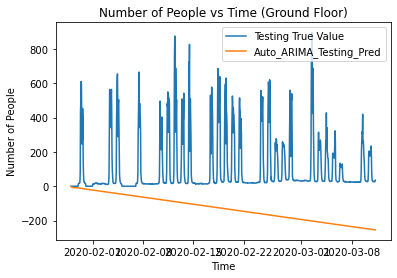

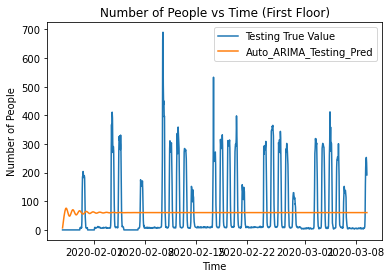

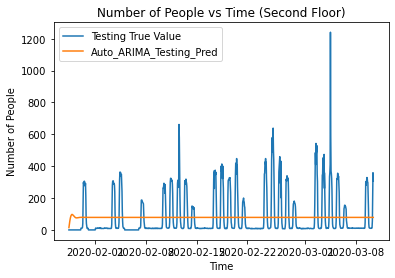

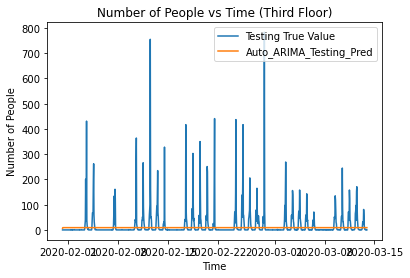

In [29]:
plt.figure(1)
plt.plot(ground_arima_test, label="Testing True Value")
plt.plot(ground_arima_predict, label='Auto_ARIMA_Testing_Pred')
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Number of People vs Time (Ground Floor)")
plt.legend()
plt.show()

plt.figure(2)
plt.plot(first_arima_test, label="Testing True Value")
plt.plot(first_arima_predict, label='Auto_ARIMA_Testing_Pred')
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Number of People vs Time (First Floor)")
plt.legend()
plt.show()

plt.figure(3)
plt.plot(second_arima_test, label="Testing True Value")
plt.plot(second_arima_predict, label='Auto_ARIMA_Testing_Pred')
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Number of People vs Time (Second Floor)")
plt.legend()
plt.show()

plt.figure(4)
plt.plot(third_arima_test, label="Testing True Value")
plt.plot(third_arima_predict, label='Auto_ARIMA_Testing_Pred')
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Number of People vs Time (Third Floor)")
plt.legend()
plt.show()